# Problem set 9

## Name: [Yawen Tan]

## Link to your PS9 github repo: [https://github.com/IsabellaTan/Brown-DATA1030-HW9]

### Problem 0 

-2 points for every missing green OK sign. 

Make sure you are in the DATA1030 environment.

In [11]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version
import sys

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12.10 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.10"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.10"):
    print(FAIL, "Python version 3.12.10 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "2.2.5", 'matplotlib': "3.10.1",'sklearn': "1.6.1", 
                'pandas': "2.2.3",'xgboost': "3.0.0", 'shap': "0.47.2", 
                'polars': "1.27.1", 'seaborn': "0.13.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.10

[ OK ] numpy version 2.2.5 is installed.
[ OK ] matplotlib version 3.10.1 is installed.
[ OK ] sklearn version 1.6.1 is installed.
[ OK ] pandas version 2.2.3 is installed.
[ OK ] xgboost version 3.0.0 is installed.
[ OK ] shap version 0.47.2 is installed.
[ OK ] polars version 1.27.1 is installed.
[ OK ] seaborn version 0.13.2 is installed.


## Introduction - ML Ethics 

In this problem set we'll explore algorithmic bias using a dataset containing information on criminal offenders screened in Florida from 2013 to 2014. The target variable (`two_year_recid`) for this dataset indicates whether or not an individual committed another crime after being released from prision. 

Machine learning models, known as Risk Assessment Tools (RATs), have been developed based on this and other similar datasets. The goal of these tools is to predict the likelihood of an individual commiting a future crime. These predictive scores are increasingly being used to inform decisions throughout the criminal justice system, including assigning bond amounts and determining sentencing lengths. As you can imagine, false positives and false negatives have severe consequences for the defendant and society in general.

On top of this, the introduction of large language models (LLMs) has added new technical and moral considersations to the development of these predictive pipelines. Increasingly, LLMs are being integrated into the workflows of data scientists who are tasked with creating RATs and other socially centered tools. As such, we will also explore the benefits and limitations of using LLMs to develop socially critical machine learning pipelines.

This problem set is broken down into the following sections:

1. Use ChatGPT to perform EDA on the dataset and answer questions related to ChatGPT's effectiveness  
2. Use ChatGPT to develop a machine learning pipeline, and discuss your findings
3. Debug your inital pipeline and study the model's algorithmic bias

**Throughout this problem set you should only be using the free version of ChatGPT.** If you have a ChatGPT subscription, please log out before you start solving this problem set. This will allow us to standardize the process across submissions. The csv file and a description are available in the `data` folder.

You can read more about the topic [here](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing) and [here](https://arxiv.org/pdf/2106.05498.pdf).

## Problem 1

In this section we'll perform EDA to get a better sense of our dataset and target variable. You should prompt ChatGPT to create graphics and feature descriptions that would be helpful for better understanding the data. Copy and paste the link to your ChatGPT conversation by clicking on the share icon in the top right hand corner on the ChatGPT UI. We list out several items that you should include in your EDA responses, but feel free to do as much EDA as you'd like! 

Note that you may need to drop some columns that clearly have no predictive power (i.e. id and name). 

### Problem 1a (5 points)

Load in the dataset and perform EDA to show the following:

1. The target variable (using .describe or .value_counts)
3. The datatypes for each feature
4. The fraction of missing values for each feature 
5. The unique races and genders in the dataset and how many people belong to each racial and gender group 

In [5]:
# your code here 
import pandas as pd

# Load the dataset
df = pd.read_csv("data/recidivism_data.csv")

# 1. Inspect the target variable
print("Target variable 'two_year_recid' value counts:")
print(df["two_year_recid"].value_counts())
print("\nTarget variable summary statistics:")
print(df["two_year_recid"].describe())

# 2. Datatypes for each feature
print("\nData types of each feature:")
print(df.dtypes)

# 3. Fraction of missing values for each feature
print("\nFraction of missing values for each feature:")
missing_fraction = df.isnull().mean()
print(missing_fraction[missing_fraction > 0])  # Show only columns with missing values

# 4. Unique races and genders and their counts
print("\nRace distribution:")
print(df["race"].value_counts())

print("\nGender distribution:")
# Sometimes the column is called "sex" instead of "gender"
gender_col = "gender" if "gender" in df.columns else "sex"
print(df[gender_col].value_counts())


Target variable 'two_year_recid' value counts:
two_year_recid
0    3963
1    3251
Name: count, dtype: int64

Target variable summary statistics:
count    7214.000000
mean        0.450652
std         0.497593
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: two_year_recid, dtype: float64

Data types of each feature:
id                      int64
name                   object
sex                    object
age                     int64
age_cat                object
race                   object
juv_fel_count           int64
juv_misd_count          int64
juv_other_count         int64
priors_count            int64
c_charge_degree        object
r_days_from_arrest    float64
two_year_recid          int64
c_jail_days           float64
custody_days          float64
dtype: object

Fraction of missing values for each feature:
r_days_from_arrest    0.678958
c_jail_days           0.042556
custody_days          0.032714
dtype: float64

Ra

### Problem 1b (10 points)

Now let's have ChatGPT perform further EDA to develop the following plots. Keep in mind that we will use accuracy as the evaluation metric:

1. Visualize the target variable 
    - Is the dataset balanced? 
    - What's the baseline accuracy? 
2. Prepare 3 figures to visualize correlations between various features and the target variable 
    - As usual, choose an appropriate visualization type, include axis labels and titles, and write a caption explaining what the figures show. 
    - One figure should show the target variable vs. gender and race.

After completing the above EDA, answer the following questions:

1. In your opinion, how good is ChatGPT at exploring datasets?
2. Could ChatGPT correctly determine whether variables are continuous/ordinal/categorical?
3. Could ChatGPT select appropriate figure types? Were the axes labeled and units shown?
4. Did you encounter buggy code that you had to fix?

Remember to share the link to your ChatGPT session!


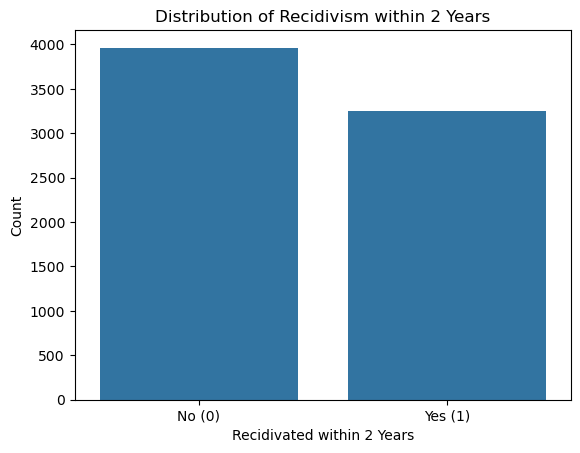

Class balance:
two_year_recid
0    0.549348
1    0.450652
Name: proportion, dtype: float64

Baseline accuracy (predicting majority class): 0.55


C:\Users\DELL\AppData\Local\Temp\ipykernel_12188\1072114724.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12188\1072114724.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


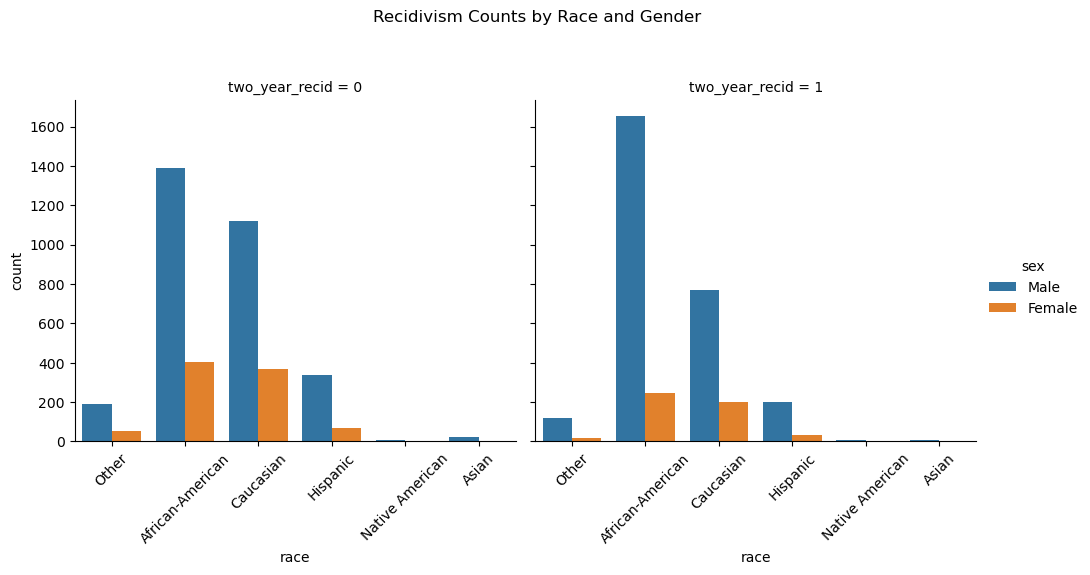

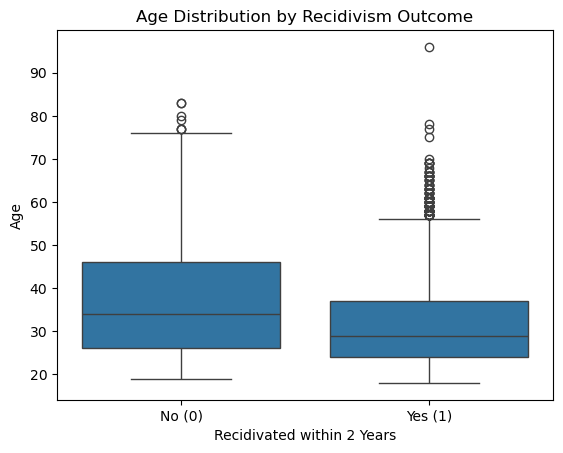

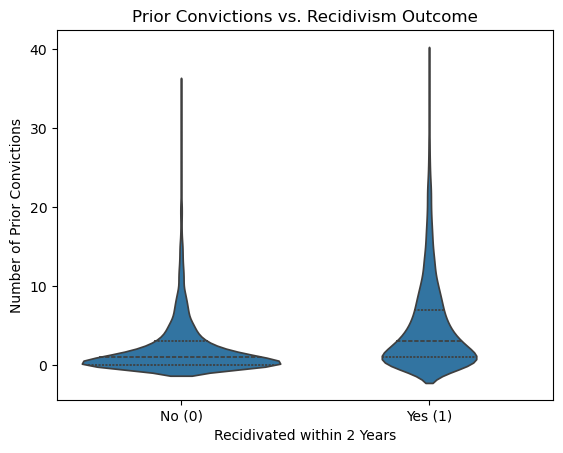

In [9]:
# your code here
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of the target variable
sns.countplot(data=df, x="two_year_recid")
plt.title("Distribution of Recidivism within 2 Years")
plt.xlabel("Recidivated within 2 Years")
plt.ylabel("Count")
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
plt.show()

# Check class balance and baseline accuracy
value_counts = df["two_year_recid"].value_counts(normalize=True)
print("Class balance:")
print(value_counts)
baseline_accuracy = value_counts.max()
print(f"\nBaseline accuracy (predicting majority class): {baseline_accuracy:.2f}")

# Barplot: recidivism rate by race and gender
g = sns.catplot(data=df, kind="count", x="race", hue=gender_col, col="two_year_recid")
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Recidivism Counts by Race and Gender")
# Rotate x-axis labels in each subplot
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()




# Age vs. Recidivism (boxplot)
sns.boxplot(data=df, x="two_year_recid", y="age")
plt.title("Age Distribution by Recidivism Outcome")
plt.xlabel("Recidivated within 2 Years")
plt.ylabel("Age")
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
plt.show()

# Prior convictions vs. recidivism
if "priors_count" in df.columns:
    sns.violinplot(data=df, x="two_year_recid", y="priors_count", inner="quartile")
    plt.title("Prior Convictions vs. Recidivism Outcome")
    plt.xlabel("Recidivated within 2 Years")
    plt.ylabel("Number of Prior Convictions")
    plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
    plt.show()



**Link to ChatGPT session for Q1a and Q1b: https://chatgpt.com/share/691fbfd0-3a94-800d-b545-1ae08352a240**

1. In your opinion, how good is ChatGPT at exploring datasets?
- I think ChatGPT performed well. It was able to correctly follow the instructions and generate the required exploratory steps, including counting and summarizing the target variable, identifying feature types, checking and and calculating missing values, and listing unique values for categorical variables. It also added brief explanatory text before each output, which made the results easier to interpret.
2. Could ChatGPT correctly determine whether variables are continuous/ordinal/categorical?
- Yes. ChatGPT correctly identified that the target variable 'two_year_recid' and the features 'race' and 'sex' are categorical variables, while features such as 'age' and 'priors_count' are continuous. However, beyond these variables, ChatGPT did not explicitly classify the remaining features.
3. Could ChatGPT select appropriate figure types? Were the axes labeled and units shown?
- ChatGPT was able to choose appropriate visualization types and plot the correct variables with proper titles and axis labels. For example, since 'age' is continuous and the target variable is categorical, ChatGPT used a boxplot. Similarly, for the continuous variable 'priors_count' vs. the categorical target, it used a violin plot. Because the selected features did not have explicit units, no units were included on the axes.
4. Did you encounter buggy code that you had to fix?
- Yes. When reading the dataset, ChatGPT used the incorrect file path (df = pd.read_csv("recidivism_data.csv")), and I had to correct it to df = pd.read_csv("data/recidivism_data.csv") because ChatGPT does not know the actual file location, only the filename. Additionally, when ChatGPT generated the plots for sex, race, and the target variable, the x-axis labels were too long and overlapped, making the plots difficult to read. I adjusted the x-axis labels afterward to improve readability.


## Problem 2

In this section, you will build an entire machine learning pipeline to predict the target variable using an XGBoost classifier. You will first use ChatGPT to generate the machine learning pipeline. Then, you'll examine ChatGPT's output and answer ethical questions regarding the use of LLMs for these types of tasks. Next, you'll debug the pipeline so that it can be used to generate predictions, which we can study for algorithmic bias. Remember you should only be using the free version of ChatGPT to answer these questions!

### Problem 2a (6 points)

Write a prompt that asks ChatGPT to generate a pipeline to perform the following:

1. load in the data 
2. split the data (this dataset is IID)
3. preprocesse the data 
4. train an XGBoost model 
    - tune at least one hyper parameter and use early stopping
    - train on five different random states 
5. save train and test scores 

Copy in the prompt you used to generate the pipeline, as well as the code itself. You can also paste in the link to your ChatGPT conversation by clicking on the share icon in the top right hand corner. 

Answer the following questions:
- What are the shortcomings of ChatGPT's work? Does the code run? If so, are the outputs as expected?
- Besides buggy code, what is one technical issue with relying on ChatGPT to generate a pipeline?
- What is one societal issue with relying on ChatGPT to generate a pipeline?
- Given the issues you identified above, what role should LLMs play in the data science work stream?

**your prompt here**

In [10]:
# ~ ChatGPT's ~ code here 

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load the dataset
data = pd.read_csv("data/recidivism_data.csv")

# Drop rows with missing values
data = data.dropna()

# Separate features and target
X = data.drop(columns=["two_year_recid", "id", "name"])
y = data["two_year_recid"]

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Create preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# Store train and test scores
train_scores = []
test_scores = []

# Train and evaluate on 5 different random states
for random_state in [0, 1, 2, 3, 4]:
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Create pipeline with XGBoost
    clf = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric="logloss"))
    ])

    # Fit model with early stopping
    clf.named_steps["classifier"].set_params(early_stopping_rounds=10)
    clf.fit(X_train, y_train, classifier__eval_set=[(X_test, y_test)], classifier__verbose=False)

    # Evaluate
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_scores.append(train_acc)
    test_scores.append(test_acc)

# Output scores
print("Train scores:", train_scores)
print("Test scores:", test_scores)


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:sex: object, age_cat: object, race: object, c_charge_degree: object

**your answers here**

**Link to ChatGPT session for Q2a: https://chatgpt.com/share/691fc95c-9044-800d-a4fc-08da92e49c85**

1. What are the shortcomings of ChatGPT's work? Does the code run? If so, are the outputs as expected?
- The pipeline generated by ChatGPT has several shortcomings. Most importantly, the code does not run. The model fails during training because several categorical features remain as object dtype when passed into XGBoost, which cannot handle raw strings. Although ChatGPT created a preprocessing pipeline, it incorrectly passed the untransformed X_test into the model during early stopping, causing a ValueError.
2. Besides buggy code, what is one technical issue with relying on ChatGPT to generate a pipeline?
- A major technical issue is that ChatGPT cannot fully understand the structure, meaning, or context of the dataset. As a result, it often applies generic preprocessing steps that may be inappropriate or suboptimal. For example, it defaulted to dropping missing values instead of evaluating whether imputation or domain-specific strategies would produce better results. It also failed to recognize that some features are ordinal rather than nominal such as 'age_cat', which describes ordered age ranges. Such variables should be encoded using ordinal encoding rather than one-hot encoding, but ChatGPT does not make this distinction.
3. What is one societal issue with relying on ChatGPT to generate a pipeline?
- A societal issue is that delegating model development to ChatGPT can amplify bias and reduce transparency in sensitive applications. ChatGPT may make preprocessing choices or modeling decisions that unintentionally encode racial or gender disparities without providing justification. If practitioners rely on automatically generated pipelines without careful auditing, the resulting predictions may reinforce systemic inequalities. 
4. Given the issues you identified above, what role should LLMs play in the data science work stream?
- LLMs should play a supporting role rather than an autonomous one. They can be helpful for brainstorming code structure, generating boilerplate templates, or suggesting preprocessing strategies, but the final pipeline must always be designed, validated, and audited by human data scientists. In high-stakes domains—such as criminal justice, healthcare, or finance—LLMs should never be relied on to make unsupervised decisions or produce models without rigorous human review. 

### Problem 2b (10 points)

Now let's debug ChatGPT's code to develop a working pipeline! You can either debug the code manually, or you can continue to prompt ChatGPT to fix previous mistakes. If you choose to further prompt ChatGPT, please include your full conversation by pasting in your session link as explained above. 

In addition to getting the pipeline up and running, please do the following:

1. Save the test scores and 5 best models in lists 
2. Save each random state's test set into a list 
    - You should save both the feature matrix and the target series. We will use these sets later to evaluate our model for bias 
    - The sets should be converted into dataframes before being added to the list 
3. Plot the correlation coefficient matrix for the last random state using the training set 
    - Should any of the features be dropped? 
4. Print the mean and standard deviation of the test scores 

The pipeline we built for this assignment has an average test accuracy of 0.842 with a standard deviation of 0.012 across five random states. Your numbers may vary due to randomness but you should look for scores around these benchmarks.


--- Summary over 5 random states---
Train scores: [0.8638017674579795, 0.8696932940564893, 0.8610292843527985, 0.8669208109513082, 0.8655345693987178]
Test scores: [0.8364518364518364, 0.841995841995842, 0.8503118503118503, 0.8447678447678447, 0.8482328482328483]
Mean test accuracy: 0.844
Std of test accuracy: 0.005


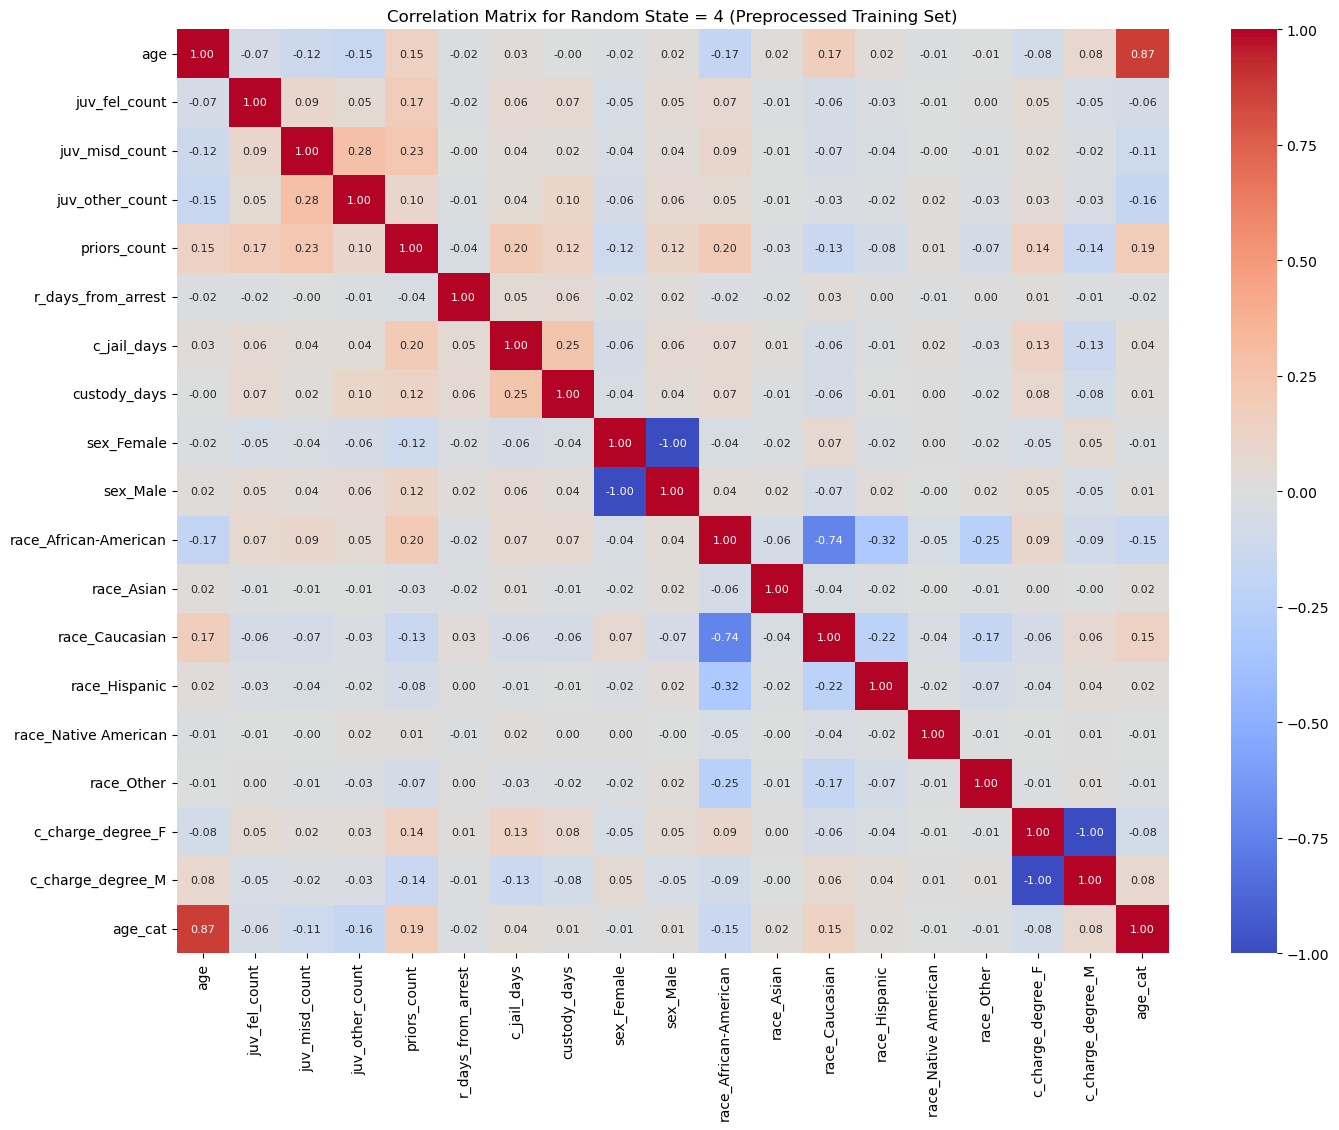

In [14]:
# your code here 
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

# Load the dataset
data = pd.read_csv("data/recidivism_data.csv")

# Drop ID and name, separate features and target
X = data.drop(columns=["two_year_recid", "id", "name"])
y = data["two_year_recid"]

# Define feature groups based on the variable description
ordinal_features = ["age_cat"]
categorical_features = ["sex", "race", "c_charge_degree"] 

# numeric features
numeric_features = [
    col for col in X.columns 
    if col not in ordinal_features + categorical_features]

# Categorical: treat missing as its own category
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# Ordinal: treat missing as "NA"
ordinal_categories = [["Less than 25", "25 - 45", "Greater than 45", "NA"]]
ordinal_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="NA")),
    ("ordinal", OrdinalEncoder(categories=ordinal_categories))
])

# Numeric
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Collect all transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        ("ord", ordinal_transformer, ordinal_features)
    ])

# Containers to store results across different random states
train_scores = []
test_scores = []
best_models = []
test_sets = []

random_states = [0, 1, 2, 3, 4]

for seed in random_states:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=seed,
        stratify=y)

    test_sets.append((X_test.copy(), y_test.copy()))

    categorical_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
        ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
    ])

    ordinal_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value="NA")),
        ("ordinal", OrdinalEncoder(categories=ordinal_categories))
    ])

    numeric_transformer = Pipeline(steps=[
        ("scaler", StandardScaler())
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features),
            ("ord", ordinal_transformer, ordinal_features)
        ])

    # Transform data
    X_train_prep = preprocessor.fit_transform(X_train)
    X_test_prep = preprocessor.transform(X_test)

    xgb_clf = XGBClassifier(
        objective="binary:logistic",
        learning_rate=0.03,
        n_estimators=10000,
        subsample=0.66,
        colsample_bytree=0.9,
        max_depth=5,
        eval_metric="logloss",
        random_state=seed,
        missing=np.nan # Handle missing values for continuous features
    )

    xgb_clf.set_params(early_stopping_rounds=50)

    xgb_clf.fit(
        X_train_prep,
        y_train,
        eval_set=[(X_test_prep, y_test)],
        verbose=False
    )

    y_train_pred = xgb_clf.predict(X_train_prep)
    y_test_pred = xgb_clf.predict(X_test_prep)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_scores.append(train_acc)
    test_scores.append(test_acc)

    best_models.append({
        "random_state": seed,
        "preprocessor": preprocessor,
        "model": xgb_clf
    })

# Print overall results
print("\n--- Summary over 5 random states---")
print("Train scores:", train_scores)
print("Test scores:", test_scores)
print(f"Mean test accuracy: {np.mean(test_scores):.3f}")
print(f"Std of test accuracy: {np.std(test_scores):.3f}")


# Correlation matrix for last random state (random_state = 4)
# Re-fit preprocessor on the last training set (random_state = 4)
preprocessor_last = preprocessor
X_train_last_prep = preprocessor_last.fit_transform(X_train)

# Extract feature names for the processed matrix
# numeric names
num_names = numeric_features
# categorical names (one-hot expanded)
cat_names = preprocessor_last.named_transformers_["cat"]["onehot"].get_feature_names_out(categorical_features)
# ordinal names
ord_names = ordinal_features  # already numeric after OrdinalEncoder
# Construct full column name list
full_feature_names = list(num_names) + list(cat_names) + list(ord_names)
# Turn the processed training matrix into a DataFrame
X_train_last_df = pd.DataFrame(X_train_last_prep, columns=full_feature_names)
# Compute correlation matrix
corr_matrix = X_train_last_df.corr()
# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True,fmt=".2f",annot_kws={"size": 8})
plt.title("Correlation Matrix for Random State = 4 (Preprocessed Training Set)")
plt.show()



**Should any of the features be dropped?**

After plotting the correlation matrix for the last random state, several pairs of features show noticeably high correlations. For example, 'age' and 'age_cat' are strongly correlated because the age categories are directly derived from the continuous age variable. The one-hot encoded variables, such as 'sex_Female' vs. 'sex_Male' and 'c_charge_degree_F' vs. 'c_charge_degree_M', also display perfect negative correlation, which is expected since they come from binary categorical variables. Some race indicators, such as 'race_African-American' and 'race_Caucasian', are moderately negatively correlated for the same reason—belonging to one category excludes belonging to another.

Although these correlations are visible in the heatmap, none of the features need to be dropped. XGBoost is robust to multicollinearity, and tree-based models do not suffer from the instability issues that linear models face when predictors are correlated. Removing one-hot columns or grouped variables could actually reduce important information, especially in a dataset where categorical structure matters for fairness analysis. Therefore, despite the presence of correlated feature pairs, all features are retained in the model.


## Problem 3

In this final section, we will use the 5 best models to create predictions for each data point in the saved test sets. We will aggregate these predictions together into one dataframe that we can investigate for a more holistic overview of our models' performance. We will also study the bias that the model has for and against certain genders and races. 


### Problem 3a (10 points)

In this problem, you will work with the 5 models and test sets that you saved in Problem 2. Specifically, use each of the models to predict the target labels of the data points in their corresponding test sets. You should concatenate these predictions, the true labels, and the original test sets into one master dataframe. For guidance, your final dataframe should have the shape: (`num_test_datapoints * 5, num_features + 2`). The two additional columns in this dataframe should be for the true and predicted values of each data point.

Print out the overall accuracy of the model!

In [6]:
import pandas as pd
import numpy as np

# create list to save each 5 test sets
df_list = []

# Loop over the 5 saved models and test sets
for i in range(5):
    # Get the model and preprocessor and test set
    model_info = best_models[i]
    model = model_info["model"]
    preprocessor = model_info["preprocessor"]
    X_test_raw, y_test_raw = test_sets[i]
    # Preprocess test set
    X_test_prepared = preprocessor.transform(X_test_raw)
    # Predict labels using the model
    y_pred = model.predict(X_test_prepared)
    
    # Construct dataframe including true and predicted labels and original features
    df_temp = X_test_raw.copy()
    df_temp["true_label"] = y_test_raw.values
    df_temp["predicted_label"] = y_pred
    # Save to list
    df_list.append(df_temp)

# Concatenate all 5 dataframes
master_df = pd.concat(df_list, axis=0).reset_index(drop=True)
# Print master dataframe shape
print("Master dataframe shape:", master_df.shape)
print(master_df.head())
# print overall accuracy
overall_accuracy = np.mean(master_df["true_label"] == master_df["predicted_label"])
print("Overall accuracy across all 5 test sets:", overall_accuracy)


Master dataframe shape: (7215, 14)
      sex  age          age_cat       race  juv_fel_count  juv_misd_count  \
0  Female   44          25 - 45  Caucasian              0               0   
1    Male   24     Less than 25  Caucasian              0               0   
2  Female   45  Greater than 45      Other              0               0   
3  Female   20     Less than 25  Caucasian              0               0   
4  Female   26          25 - 45  Caucasian              0               0   

   juv_other_count  priors_count c_charge_degree  r_days_from_arrest  \
0                0            10               F                98.0   
1                0             3               F                59.0   
2                0             0               M                 NaN   
3                0             4               F                 NaN   
4                0             0               F                 NaN   

   c_jail_days  custody_days  true_label  predicted_label  
0     5.9

### Problem 3b (6 points)

We will now disaggregate the results and study the model's performance across various racial and gender groups. Let's focus on Caucasians and African-Americans because not many people belong to the other racial groups. 

Calculate and plot the following. The confusion matrices should be normalized with respect to the true conditions. We've provided the expected output for the female-only confusion matrix for your reference:

1. overall accuracy and confusion matrix for males
2. overall accuracy and confusion matrix for females
3. overall accuracy and confusion matrix for Caucasians
4. overall accuracy and confusion matrix for African-Americans

Study the accuracies and the normalized false positives in the confusion matrices!

Write a couple of paragraphs and discuss your findings. How do you feel about the overall accuracy of the model? Are there racial and gender groups for which the model performs better/worse? What do the false positives in the confusion matrix mean for criminal defendants?

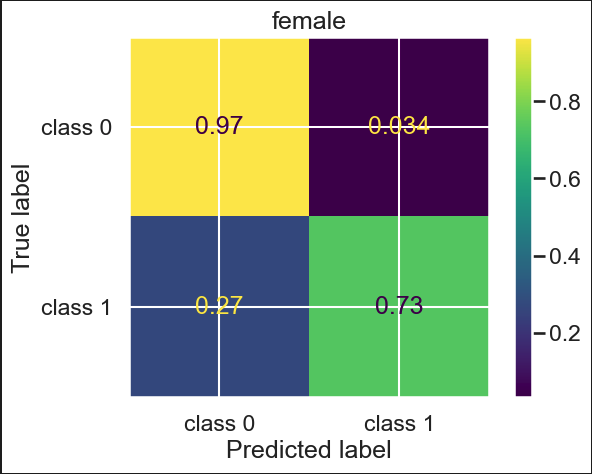

In [12]:

from IPython.display import Image
Image(r"images/confusion_mat.png")


Male accuracy: 0.838


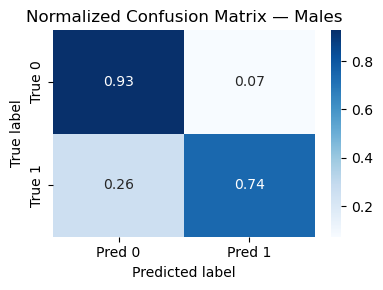

Female accuracy: 0.870


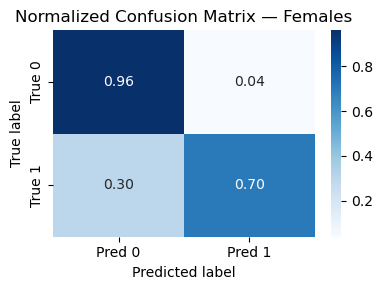

Caucasian accuracy: 0.863


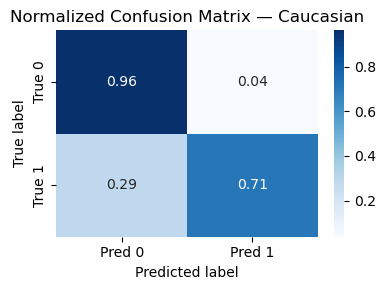

African-American accuracy: 0.827


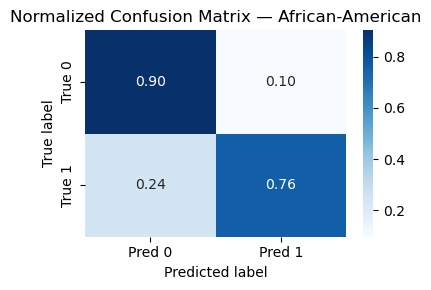

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

def plot_confusion_matrix(true, pred, title):
    """
    Draw a normalized confusion matrix (normalized by true labels)
    """
    cm = confusion_matrix(true, pred, normalize='true')
    
    plt.figure(figsize=(4, 3))
    sns.heatmap(
        cm, annot=True, fmt=".2f", cmap="Blues",
        xticklabels=["Pred 0", "Pred 1"],
        yticklabels=["True 0", "True 1"]
    )
    plt.title(title)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.tight_layout()
    plt.show()


# Males
male_df = master_df[master_df["sex"] == "Male"]
male_acc = accuracy_score(male_df["true_label"], male_df["predicted_label"])
print(f"Male accuracy: {male_acc:.3f}")
plot_confusion_matrix(male_df["true_label"], male_df["predicted_label"],
                      "Normalized Confusion Matrix — Males")

# Females
female_df = master_df[master_df["sex"] == "Female"]
female_acc = accuracy_score(female_df["true_label"], female_df["predicted_label"])
print(f"Female accuracy: {female_acc:.3f}")
plot_confusion_matrix(female_df["true_label"], female_df["predicted_label"],
                      "Normalized Confusion Matrix — Females")

# Caucasians
cauc_df = master_df[master_df["race"] == "Caucasian"]
cauc_acc = accuracy_score(cauc_df["true_label"], cauc_df["predicted_label"])
print(f"Caucasian accuracy: {cauc_acc:.3f}")
plot_confusion_matrix(cauc_df["true_label"], cauc_df["predicted_label"],
                      "Normalized Confusion Matrix — Caucasian")


# African-Americans
aa_df = master_df[master_df["race"] == "African-American"]
aa_acc = accuracy_score(aa_df["true_label"], aa_df["predicted_label"])
print(f"African-American accuracy: {aa_acc:.3f}")
plot_confusion_matrix(aa_df["true_label"], aa_df["predicted_label"],
                      "Normalized Confusion Matrix — African-American")


**Write a couple of paragraphs and discuss your findings. How do you feel about the overall accuracy of the model? Are there racial and gender groups for which the model performs better/worse? What do the false positives in the confusion matrix mean for criminal defendants?**

Overall accuracy across all 5 test sets is around 0.844 (from Q3a).The overall accuracy of the model is reasonably strong, with values ranging from roughly 0.83 to 0.87 across different gender and race groups. This suggests that the classifier captures meaningful patterns in the recidivism data. Across all groups, true-negative rates (the top-left cell) are high, indicating the model is generally good at identifying individuals who will not recidivate.

The model performs best for females (accuracy ≈ 0.87) and Caucasians (accuracy ≈ 0.86). Performance is slightly worse for males (≈ 0.84) and is lowest for African-Americans (≈ 0.83). The false-positive rates which show as the proportion of true non-recidivators incorrectly predicted as recidivists, are also uneven: African-Americans have a higher false-positive rate (0.10) compared to Caucasians and females (both ≈ 0.04). A higher false-positive rate means more people who did not commit another crime are incorrectly flagged as “high risk.” In the criminal justice context, this is serious because false positives can translate into harsher bail decisions, longer sentences, or stricter supervision. These disparities suggest that although the model is fairly accurate overall, it may not be equally fair for all racial and gender groups.

